In [3]:
#impporting necessary packages 
import pandas as pd 
import json

In [4]:
#loading the necessary data
df1=pd.read_excel('bangalore_cars.xlsx')
df2=pd.read_excel('chennai_cars.xlsx')
df3=pd.read_excel('delhi_cars.xlsx')
df4=pd.read_excel('hyderabad_cars.xlsx')
df5=pd.read_excel('jaipur_cars.xlsx')
df6=pd.read_excel('kolkata_cars.xlsx')

In [5]:
#concatenating data
df=pd.concat([df1,df2,df3,df4,df5,df6],axis=0)

In [6]:
df

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...
1376,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1377,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1378,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1379,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [7]:
#dropping unnecessary columns
df=df.drop(columns='car_links')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8369 entries, 0 to 1380
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   new_car_detail    8369 non-null   object
 1   new_car_overview  8369 non-null   object
 2   new_car_feature   8369 non-null   object
 3   new_car_specs     8369 non-null   object
dtypes: object(4)
memory usage: 326.9+ KB


The data is in JSON format meaning that the data is nested in JSon strings in columns. Although the data is in the format of JSON string the data is using single quote and None which should be changed in order to use JSON normalize 

In [9]:
replacement_dict = {"'": "\"", "None": "null"}

In [10]:
#replacing the sympols to make the data properly json string compatible 
df['new_car_detail']=df['new_car_detail'].apply(lambda x: json.loads(x.replace("'", "\"").replace("None", "null")))
df['new_car_overview']=df['new_car_overview'].apply(lambda x: json.loads(x.replace("'", "\"").replace("None", "null")))
df['new_car_feature']=df['new_car_feature'].apply(lambda x: json.loads(x.replace("'", "\"").replace("None", "null")))
df['new_car_specs']=df['new_car_specs'].apply(lambda x: json.loads(x.replace("'", "\"").replace("None", "null")))

In [11]:
#using JSON normalize 
n1 = pd.json_normalize(df['new_car_detail'])
n2= pd.json_normalize(df['new_car_overview'])
n3= pd.json_normalize(df['new_car_feature'])
n4= pd.json_normalize(df['new_car_specs'])

In [12]:
n1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   it                    8369 non-null   int64 
 1   ft                    8369 non-null   object
 2   bt                    8369 non-null   object
 3   km                    8369 non-null   object
 4   transmission          8369 non-null   object
 5   ownerNo               8369 non-null   int64 
 6   owner                 8369 non-null   object
 7   oem                   8369 non-null   object
 8   model                 8369 non-null   object
 9   modelYear             8369 non-null   int64 
 10  centralVariantId      8369 non-null   int64 
 11  variantName           8369 non-null   object
 12  price                 8369 non-null   object
 13  priceActual           8369 non-null   object
 14  priceSaving           8369 non-null   object
 15  priceFixedText        0 non-null      

In [13]:
n1=n1.rename(columns={'ft':'fuel_type','bt':'style'})

I have decided to use n4 as well in the model's training data to improve the model

In [14]:
n4=n4.drop(columns='commonIcon')

In [15]:
#choosing only the column that has the necessary specifications and converting it to json string
json_string = n4['top'].to_json(orient='records')

In [16]:
#further normalizing the column
n4n = pd.json_normalize(json.loads(json_string))

In [17]:
n4n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       8369 non-null   object
 1   1       8368 non-null   object
 2   2       8361 non-null   object
 3   3       8342 non-null   object
 4   4       8249 non-null   object
 5   5       5126 non-null   object
dtypes: object(6)
memory usage: 392.4+ KB


In [18]:
#renaming the column and dropping the seat column because of higher null count 
n4n=n4n.rename(columns={0:'mileage',1:'cc',2:'hp',3:'torque',4:'wheelsize',5:'seats'})
n4n=n4n.drop(columns='seats')

In [19]:
n4n.head(3)

,mileage,cc,hp,torque,wheelsize
0,"{'key': 'Mileage', 'value': '23.1 kmpl'}","{'key': 'Engine', 'value': '998 CC'}","{'key': 'Max Power', 'value': '67.04bhp'}","{'key': 'Torque', 'value': '90Nm'}","{'key': 'Seats', 'value': '5'}"
1,"{'key': 'Mileage', 'value': '17 kmpl'}","{'key': 'Engine', 'value': '1497 CC'}","{'key': 'Max Power', 'value': '121.31bhp'}","{'key': 'Torque', 'value': '150Nm'}","{'key': 'Wheel Size', 'value': '16'}"
2,"{'key': 'Mileage', 'value': '23.84 kmpl'}","{'key': 'Engine', 'value': '1199 CC'}","{'key': 'Max Power', 'value': '84bhp'}","{'key': 'Torque', 'value': '114Nm'}","{'key': 'Wheel Size', 'value': '14'}"


As we can see the data frame n4n has the values in another dictionary and to extract it we can use JSON normalize but to do that every column needs to be JSON  normalized and then the data should be extracted into data frame. Instead I have decided to use string operation to keep only numbers with exception of float values.

In [20]:
#creating a lambda function to keep only numbers 
n4n=n4n.applymap(lambda x: pd.to_numeric(''.join(filter(lambda char: char.isdigit() or char == '.', str(x))), errors='coerce')) 

In [21]:
n4n.head()

,mileage,cc,hp,torque,wheelsize
0,23.10,998.0,67.04,90.00,5.0
1,17.00,1497.0,121.31,150.00,16.0
2,23.84,1199.0,84.00,114.00,14.0
3,19.10,1197.0,81.86,113.75,14.0
4,23.65,1248.0,88.50,200.00,16.0


In [22]:
#concatenating n4n with n1 
n1=pd.concat([n1,n4n],axis=1)

In [23]:
n1.head()

,it,fuel_type,style,km,transmission,ownerNo,owner,oem,model,modelYear,...,priceSaving,priceFixedText,trendingText.imgUrl,trendingText.heading,trendingText.desc,mileage,cc,hp,torque,wheelsize
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,23.10,998.0,67.04,90.00,5.0
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,17.00,1497.0,121.31,150.00,16.0
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,...,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,23.84,1199.0,84.00,114.00,14.0
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,19.10,1197.0,81.86,113.75,14.0
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,23.65,1248.0,88.50,200.00,16.0


In [24]:
#dropping duplicates 
n1=n1.drop_duplicates()

In [25]:

n1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8244 entries, 0 to 8368
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   it                    8244 non-null   int64  
 1   fuel_type             8244 non-null   object 
 2   style                 8244 non-null   object 
 3   km                    8244 non-null   object 
 4   transmission          8244 non-null   object 
 5   ownerNo               8244 non-null   int64  
 6   owner                 8244 non-null   object 
 7   oem                   8244 non-null   object 
 8   model                 8244 non-null   object 
 9   modelYear             8244 non-null   int64  
 10  centralVariantId      8244 non-null   int64  
 11  variantName           8244 non-null   object 
 12  price                 8244 non-null   object 
 13  priceActual           8244 non-null   object 
 14  priceSaving           8244 non-null   object 
 15  priceFixedText        0 no

In [26]:
#creating a new dataframe with only necessary columns 
dfc=n1[['fuel_type','style','km','transmission','ownerNo','oem','model','modelYear','centralVariantId','mileage', 'cc', 'hp', 'torque', 'wheelsize','price',]]

In [27]:
dfc.head()

,fuel_type,style,km,transmission,ownerNo,oem,model,modelYear,centralVariantId,mileage,cc,hp,torque,wheelsize,price
0,Petrol,Hatchback,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,3979,23.10,998.0,67.04,90.00,5.0,₹ 4 Lakh
1,Petrol,SUV,"32,706",Manual,2,Ford,Ford Ecosport,2018,6087,17.00,1497.0,121.31,150.00,16.0,₹ 8.11 Lakh
2,Petrol,Hatchback,"11,949",Manual,1,Tata,Tata Tiago,2018,2983,23.84,1199.0,84.00,114.00,14.0,₹ 5.85 Lakh
3,Petrol,Sedan,"17,794",Manual,1,Hyundai,Hyundai Xcent,2014,1867,19.10,1197.0,81.86,113.75,14.0,₹ 4.62 Lakh
4,Diesel,SUV,"60,000",Manual,1,Maruti,Maruti SX4 S Cross,2015,4277,23.65,1248.0,88.50,200.00,16.0,₹ 7.90 Lakh


In [28]:
#making the prize as numbers 
dfc['price'] = dfc['price'].str.extract(r'₹\s*([\d.]+)\s*Lakh').astype(float)


C:\Users\devli\AppData\Local\Temp\ipykernel_9764\1630862697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['price'] = dfc['price'].str.extract(r'₹\s*([\d.]+)\s*Lakh').astype(float)


In [29]:
dfc['price'].head()

0    4.00
1    8.11
2    5.85
3    4.62
4    7.90
Name: price, dtype: float64

In [30]:
#making the km as int
dfc['km']=dfc['km'].str.replace(',', '').astype('int64')

C:\Users\devli\AppData\Local\Temp\ipykernel_9764\411520910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['km']=dfc['km'].str.replace(',', '').astype('int64')


In [31]:
#dropping null values 
dfc=dfc.dropna()

In [32]:
#splitting dfc as cat and num to scale and encode 
num=dfc.select_dtypes(include=['Int64','float64'])
cat=dfc.select_dtypes(include=['object'])


In [33]:
#checking correlation 
num.corrwith(num['price'])

km                 -0.077978
ownerNo            -0.127344
modelYear           0.346881
centralVariantId    0.202861
mileage             0.301793
cc                  0.015366
hp                 -0.008536
torque             -0.019481
wheelsize           0.323558
price               1.000000
dtype: float64

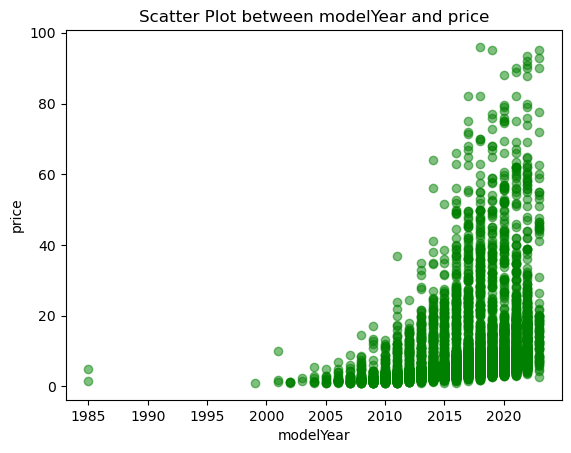

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(num['modelYear'], num['price'], alpha=0.5, color='green')
plt.title('Scatter Plot between modelYear and price')
plt.xlabel('modelYear')
plt.ylabel('price')
plt.show()

In [35]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [36]:
#using label encoder to encode categorical columns 
encoder = LabelEncoder()
encoded=cat.apply(lambda col:encoder.fit_transform(col))

In [37]:
encoded=encoded.reset_index()

In [38]:
#using standard scaler to scale numeric columns
scaler=StandardScaler()
scaled=scaler.fit_transform(num)

In [39]:
scaled=pd.DataFrame(scaled,columns=num.columns)
encoded=pd.DataFrame(encoded)

In [40]:
scaled=scaled.reset_index()

In [41]:
x=pd.concat([encoded,scaled],axis=1)

In [42]:
x=x.drop(columns=['index','index'])

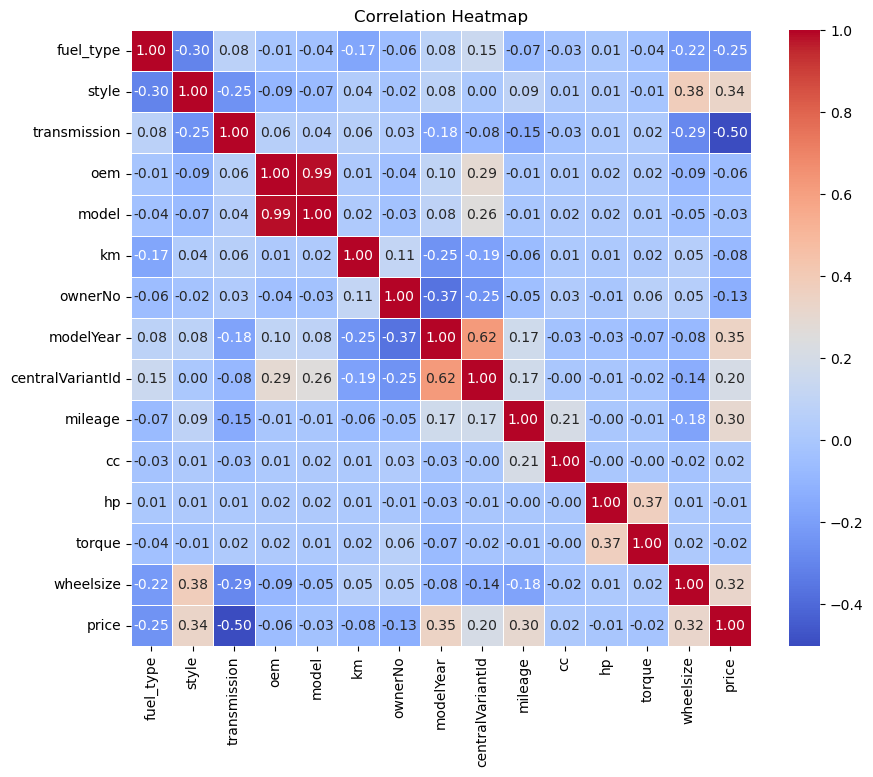

In [43]:

correlation_matrix = x.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [44]:
#splitting x and y
y=x['price']
x=x.drop(columns='price')

In [45]:
#splitting for train test split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [46]:
#using random forest regressor 
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(x_train, y_train)

y_pred = rf_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.08697203497012544
R-squared: 0.9171964881089194


In [47]:
#using k neighbors regressor 
from sklearn.neighbors import KNeighborsRegressor
k = 5  # Number of neighbors
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"KNN Regression Mean Squared Error: {mse}")
print(f"KNN Regression R-squared: {r2}")

KNN Regression Mean Squared Error: 0.23563149984400977
KNN Regression R-squared: 0.7756621918074171
